# What is matplotlib?

Matplotlib does, well, plotting. Pretty much every kind of plot, from bar charts to scatter plots to images/heat maps.

There are a TON of examples on-line, see https://matplotlib.org/. They also have cheat sheets; I like this one for
basic how to make the plot look the way I want: https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

There are a few "quirks" with matplotlib that can cause some headaches/frustrations, but most of the functionality is pretty easy to understand/use - give it data, tell it how to plot it, put some labels on it, adjust colors, line widths, etc until it's legible.

A note on using matplotlib in Jupyter notebooks. The most stable, easily transportable version of plotting is *inline* plotting. In this mode, matplotlib executes all of the plot-related commands in the cell, makes an image, and puts the image in the output. matplotlib itself is capable of making stand-alone windows that have handy interactive tools that let you zoom in, click on the plots to see data, and all sorts of other useful things (interactive plotting). It **is** possible to do this within a Jupyter notebook, but a generic Jupyter Notebook won't support it (yet). To keep this code portable, we're just going to do inline plotting.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This "magic" command tells matplotlib to make in-line images of plots.
%matplotlib inline

## Making a plot - use case 1

We'll use made-up data to practice plotting with.

This is a first example of setting parameters to functions by name. Note the num= and the degree=. If you go to here: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html and look at the parameters, you'll see that linspace requires two of them, start and stop, (they don't have default values) but there are a lot of other parameters that have default values. We've set one of them, number of elements, to be 200 instead of the default 50

matplotlib makes heavy use of this feature of python (specifying one of a bunch of function parameters by name).

In [2]:
t_values = np.linspace(-np.pi, np.pi, num=200)
y1_values = np.sin(t_values)
y2_values = np.cos(t_values)

print(f"Num elems in array: {len(t_values)}, First sin value: {y1_values[0]}")

Num elems in array: 200, First sin value: -1.2246467991473532e-16


# PLOT

This command is THE most basic plot command. This creates a window/figure, makes 1 subplot, and plots t versus y. You have some control over what the plot looks like - see below - but essentially, matplotlib does all of the commands in the cell (in this case, just the plot), creates the figure, then puts the image in the output.

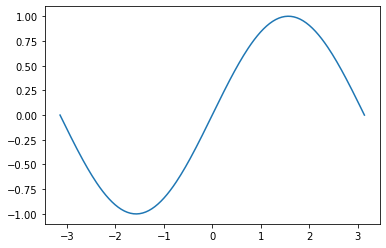

In [3]:
plt.plot(t_values, y1_values)

What happens if I plot a second plot? Answer: It just runs matplotlib's plotting again, and outputs the new image.

In [ ]:
plt.plot(t_values, y2_values)

If you want to put more than one thing in a plot, or add titles and what-not, you need to put all of the commands in one cell. Here we'll put the first and second plots, a label on the x-axix, and a title

In [ ]:
plt.plot(t_values, y1_values)
plt.plot(t_values, y2_values)
plt.xlabel('t-values')
plt.title('My Cos Sin plot')

## Use case 2 - you want more control over the plots/more subplots

If one plot is good, two must be better!

Sometimes you want to show more than one plot at the same time, or you want more control over the plot. The main difference between this example and the one above is that we'll use plotting commands that return *handles* to the plotting objects. If you're plotting in more than one plotting area, this lets you directly access those plotting areas using the returned variable

Things to notice
- There's more than one area to plot in 
- The size of the window - short and wide. This is set with figsize
- The variable axs is how you get to each of the plotting areas. Annoyance with axs: If you only have one plotting area, just use axs.plot(). If you have a grid, use axs[row, col].plot().

Note that ALL of the plot commands have to be in one cell. If you put them in a second cell, nothing will happen. To see what each of the individual plot commands do, try commenting them out and see how the figure changes when you re-run the cell.

In [ ]:
# I like to use variables for number of rows and columns so I don't have to change all of the 
# subplots later if I decide to add another row...
nrows = 1
ncols = 2

# Create a grid of plots, with the window size set to figsize - in this case, make it twice as wide as tall
fig, axs = plt.subplots(nrows, ncols, figsize=(6, 3))

# Add a title over all the subplots
fig.suptitle("Trigonometry")

# Plot sin and cos in the first window. label= is used to assign a label to the plotted line (see legend)
axs[0].plot(t_values, y1_values, '-b', label="Sin")
axs[0].plot(t_values, y2_values, '-g', label="Cos")
axs[0].set_title('Sin and cos')
axs[0].set_xlabel('t values')
axs[0].set_ylabel('y values')

# Notice that legend one doesn't have a set_. This takes each labeled plot line and makes a legend with it
axs[0].legend(loc='upper left')   # Without explicit instructions it will put it wherever it deems best

# Now do a SECOND plot that is a circle. Notice axs[1] instead of axs[0]
axs[1].plot(y1_values, y2_values, '--b', label='circle')
axs[1].set_title('Circle')

# This forces the axes to use the same spacing - if you take it out, the circle will not be a circle anymore...
axs[1].axis('equal')

plt.show()

# Plotting gotchas
The following are some common errors/problems that arise with plotting

## What happens if you only give it one array of data?

One weirdness that is (usually) easy to spot, but not always obvious, is that if you DON'T give plot two arrays,
 then it will just assume the t-values are 0, 1, etc. This is not a problem, unless it makes the first plot "disappear" because the ranges of the values are so different.

Notice the teeny, tiny red dot in the upper left corner. That's all that's left of the cos plot, which only goes from -0.01 to 0.01.

In [ ]:
# Very small x range
plt.plot(np.linspace(-0.01, 0.01, 100), np.cos(np.linspace(-0.01, 0.01, 100)), '-r', label='Small cos')
# The cosine plot seems to "disappear" because it is really, really skinny wrt this plot
plt.plot(y1_values, '--b', label='Big x value')

plt.legend() # Just to prove that both plots DO exist

## plot(x,y) x and y must be the same size/have the same number of elements

There are a couple ways this happens. One is you just created the arrays the wrong size, eg ValueError: x and y must have same first dimension, but have shapes (10,) and (50,). Pay attention to the error message at the very bottom, where it says 

ValueError: x and y must have same first dimension, but have shapes (10,) and (50,)

TODO: Try fixing it, but making the arrays the same size

In [ ]:
# This generates an error because the default size of the array is 50, but you set the x array to have size 10...
plt.plot(np.linspace(0, 1, num=10), np.linspace(0, 10), '-b')

Sometimes you're trying to pull out data from a matrix and you drop a colon, or get the rows and columns messed up

TODO: Try to fix this one - hint, one is plotting the first row of the matrix, the other the first column

In [ ]:
matrix_data = np.random.random([20, 30])

# Swapped row/column
plt.plot(matrix_data[:, 0], matrix_data[0, :], '-x')

# Commonly raised errors

Common gotcha: When calling **xlabel** etc from plot, the command name is xlabel. When calling using the axes variable, the command name is set_label(). If you call xlabel, you'll get the rather cryptic error:
   AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

This is because axs is actually a text object...

TODO: Fix this by taking out the "bad" x label

In [ ]:
plt.xlabel('x label')  # This works
axs[0].xlabel('xlabel')  # Generates attribute error
axs[0].set_xlabel('xlabel')  # The correct command

Just to be annoying, legend is just legend - this will cause a 

AttributeError: 'AxesSubplot' object has no attribute 'set_legend'

TODO: Fix this 

In [ ]:
axs[0].set_legend()

## Bad parameters

If you mess up the parameters to plot by giving it something it doesn't understand, you'll get the rather cryptic error: 

AttributeError: 'Line2D' object has no property 'fmt'

This is because plt.plot will pass on the parameters to a Line2D object, which doesn't know what "fmt" means

TODO: Go to the documentation page for matplotlib, plot and pick a different parameter (say line width) and change fmt  and 'foo' to set the linewidth instead. (See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html and look for linewidth)

In [ ]:
plt.plot(t_values, y1_values, fmt='foo')

If you get the name of the parameter right, but set it to something matplotlib doesn't understand, the error message is usually a big more helpful:

ValueError: 'dash' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

TODO: Fix this by finding a linestyle that works. See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html 

In [ ]:
plt.plot(t_values, y1_values, linestyle='dash')